In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files 
files.upload()

Saving jjj-copy.csv to jjj-copy (1).csv


{'jjj-copy.csv': b',MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm\r\n139049,18.1,28.3,0,30,13,15,72,41,1017.3,1013.6,8,1,20.9,27.5\r\n139054,10.6,23.2,0,30,9,9,40,23,1019.8,1015.7,8,7,15,22\r\n139055,11.4,24.7,0,33,4,17,40,19,1019.1,1017,7,5,17.4,24.1\r\n139060,9.6,28.2,0,39,0,24,44,27,1025.2,1021.5,7,5,17.9,27\r\n139081,13.2,27.1,0,41,15,22,24,23,1019.5,1016.8,3,1,21.9,26.8\r\n139111,20,33.1,0,41,13,17,81,32,1016,1012.1,1,2,25.4,32.3\r\n139112,19.4,32.4,0,50,15,28,81,17,1016.8,1012.4,1,1,24.3,31.9\r\n139113,18.2,31.8,0,46,22,19,38,24,1017.2,1013,0,1,24.3,31.2\r\n139114,17.3,30.7,0,44,22,13,55,16,1017.3,1013.6,2,6,21.3,29.8\r\n139115,15.5,30.8,0,46,20,19,37,16,1016.3,1012.6,1,1,22.2,29.6\r\n139116,16.2,31.9,0,41,11,13,62,18,1015.8,1012.2,0,0,22.8,30.5\r\n139117,17,32.7,0,48,11,22,54,18,1016.7,1013.1,5,2,23.3,31.5\r\n139118,19.6,30.8,0,54,20,33,36,12,1018.2,1014.6,1,0,22.3,30.2\r\n139119

In [ ]:
df = pd.read_csv("jjj-copy.csv")

In [ ]:
df.head(5)

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,139049,18.1,28.3,0.0,30,13,15,72,41,1017.3,1013.6,8,1,20.9,27.5
1,139054,10.6,23.2,0.0,30,9,9,40,23,1019.8,1015.7,8,7,15.0,22.0
2,139055,11.4,24.7,0.0,33,4,17,40,19,1019.1,1017.0,7,5,17.4,24.1
3,139060,9.6,28.2,0.0,39,0,24,44,27,1025.2,1021.5,7,5,17.9,27.0
4,139081,13.2,27.1,0.0,41,15,22,24,23,1019.5,1016.8,3,1,21.9,26.8


In [ ]:
scaler = MinMaxScaler()
# transform data
#y = (x – min) / (max – min)
x = scaler.fit_transform(df)

In [ ]:
g = pd.DataFrame(x, columns = ['a','MinT','MaxT','rain','WindG','Winds9','Winds3','Hum9','Hum3','P9','P3','C9','C3','T9','T3'])

In [ ]:
g.head(5)

,a,MinT,MaxT,rain,WindG,Winds9,Winds3,Hum9,Hum3,P9,P3,C9,C3,T9,T3
0,0.000000,0.595318,0.519878,0.0,0.193277,0.206349,0.288462,0.698925,0.378947,0.639437,0.632124,1.000,0.125,0.500000,0.557185
1,0.000780,0.344482,0.363914,0.0,0.193277,0.142857,0.173077,0.354839,0.189474,0.709859,0.686528,1.000,0.875,0.297945,0.395894
2,0.000936,0.371237,0.409786,0.0,0.218487,0.063492,0.326923,0.354839,0.147368,0.690141,0.720207,0.875,0.625,0.380137,0.457478
3,0.001716,0.311037,0.516820,0.0,0.268908,0.000000,0.461538,0.397849,0.231579,0.861972,0.836788,0.875,0.625,0.397260,0.542522
4,0.004993,0.431438,0.483180,0.0,0.285714,0.238095,0.423077,0.182796,0.189474,0.701408,0.715026,0.375,0.125,0.534247,0.536657


In [ ]:
r = g.drop(['a', 'rain'], axis = 1)

In [ ]:
r.head(5)

,MinT,MaxT,WindG,Winds9,Winds3,Hum9,Hum3,P9,P3,C9,C3,T9,T3
0,0.595318,0.519878,0.193277,0.206349,0.288462,0.698925,0.378947,0.639437,0.632124,1.000,0.125,0.500000,0.557185
1,0.344482,0.363914,0.193277,0.142857,0.173077,0.354839,0.189474,0.709859,0.686528,1.000,0.875,0.297945,0.395894
2,0.371237,0.409786,0.218487,0.063492,0.326923,0.354839,0.147368,0.690141,0.720207,0.875,0.625,0.380137,0.457478
3,0.311037,0.516820,0.268908,0.000000,0.461538,0.397849,0.231579,0.861972,0.836788,0.875,0.625,0.397260,0.542522
4,0.431438,0.483180,0.285714,0.238095,0.423077,0.182796,0.189474,0.701408,0.715026,0.375,0.125,0.534247,0.536657


In [ ]:
#r.isnull().sum()

In [ ]:
#y = x.dropna(how = 'any').shape

In [ ]:
#df.to_excel('rrr.xlsx')

In [ ]:
y = df['Rainfall']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.svm import SVR
#svm1 = SVR(kernel='rbf', degree=0.1, gamma='auto', C = 100, max_iter=-1, cache_size=200, verbose=False)
svm1 = SVR(kernel='linear', degree=5, gamma='auto', C = 10, max_iter=-1, cache_size=200, verbose=False)
q = svm1.fit(x_train,y_train)
#J = q.predict(x_train)
J = q.predict(x_test)

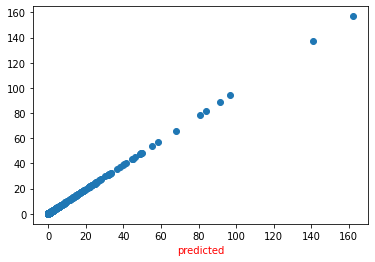

In [ ]:
plt.scatter(y_test, J)
plt.xlabel("Actual", color='r')
plt.xlabel("predicted")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import brier_score_loss

In [ ]:
mean_squared_error(y_test, J)

0.1642852972750878

In [ ]:
r2_score(y_test, J)

0.9990294756955187

In [ ]:
mean_absolute_error(y_test, J)

0.16050451433981616

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


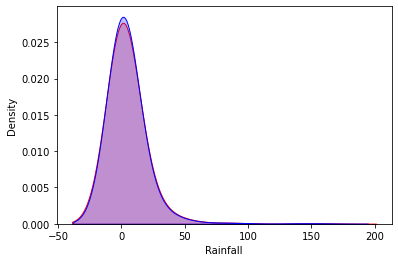

In [ ]:
#estimate prbability estimition funtion using kde(kernel density function)
sns.kdeplot(y_test, shade=True, color='red', bw=1)
#plt.axvline(y_test[1], color='red')
sns.kdeplot(J, shade=True, color='blue', bw=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


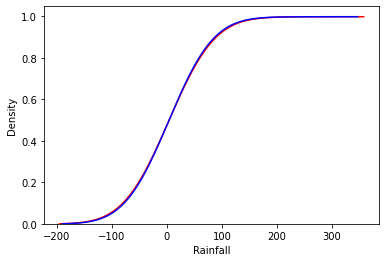

In [ ]:
sns.kdeplot(y_test, cumulative=True, color='red', bw=5)
#plt.axvline(y_test[1], color='red')
sns.kdeplot(J, cumulative=True, color='blue', bw=5)
plt.show()